# Solution for Question 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Forward Euler Method

In [2]:
def euler_fwd(f, t0, tf, y0, h):
    n = int((tf - t0) / h)
    x = np.linspace(t0, tf, n + 1)
    y = np.zeros((2, n + 1))
    y[:,0] = y0
    for i in range(n):
        y_prime = f(x[i],y[:,i])
        y[:,i + 1] =y[:,i] + h * np.array(y_prime)
    return x,y

Mid point method

In [3]:
def midpoint(f, t0, tf, y0, h):
    n = int((tf - t0) / h)
    x = np.linspace(t0, tf, n + 1)
    y = np.zeros((2, n + 1))
    y[:,0] = y0
    for i in range(n):
        t_mid = x[i] + 0.5 * h
        y_mid =y[:,i] + 0.5 * h * np.array(f(x[i],y[:,i]))
        y[:,i + 1] =y[:,i] + h * np.array(f(t_mid, y_mid))
    return x,y

Heuns'Method

In [4]:
def heun(f, t0, tf, y0, h):
    n = int((tf - t0) / h)
    x = np.linspace(t0, tf, n + 1)
    y = np.zeros((2, n + 1))
    y[:,0] = y0
    for i in range(n):
        k1 = np.array(f(x[i],y[:,i]))
        k2 = np.array(f(x[i] + h,y[:,i] + h * k1))
        y[:,i + 1] =y[:,i] + 0.5 * h * (k1 + k2)
    return x,y

Runge Kutta order 4 method

In [5]:
def rungek4(f, t0, tf, y0, h):
    n = int((tf - t0) / h)
    x = np.linspace(t0, tf, n + 1)
    y = np.zeros((2, n + 1))
    y[:,0] = y0
    for i in range(n):
        k1 = h * np.array(f(x[i],y[:,i]))
        k2 = h * np.array(f(x[i] + 0.5 * h,y[:,i] + 0.5 * k1))
        k3 = h * np.array(f(x[i] + 0.5 * h,y[:,i] + 0.5 * k2))
        k4 = h * np.array(f(x[i] + h,y[:,i] + k3))
        y[:,i + 1] =y[:,i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return x,y

Example usage for each method and plotting the solution so obtained and also playing with different h values

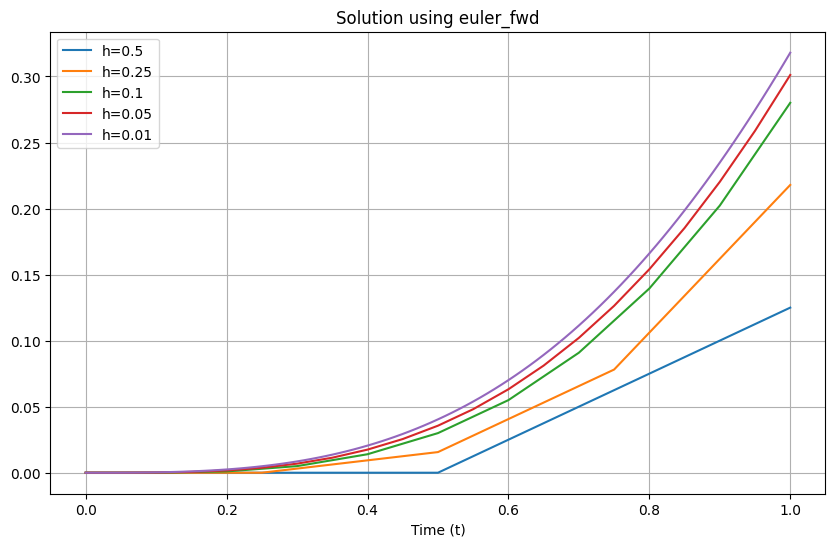

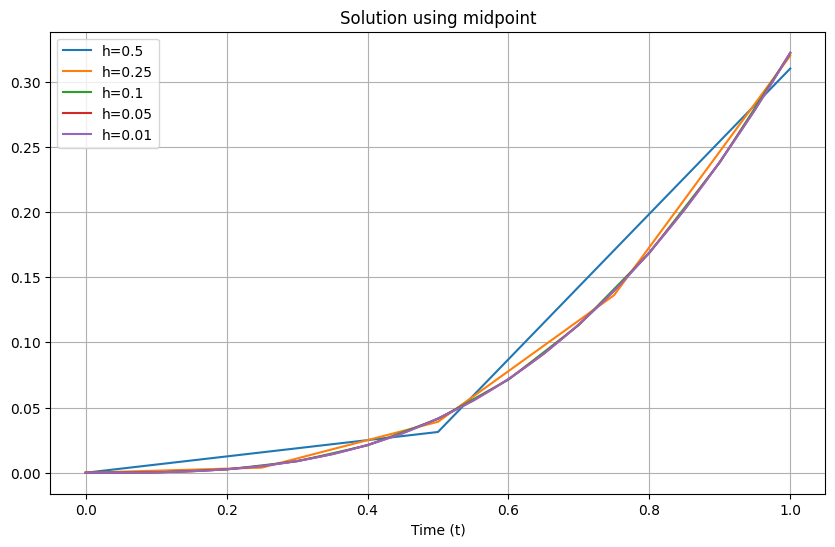

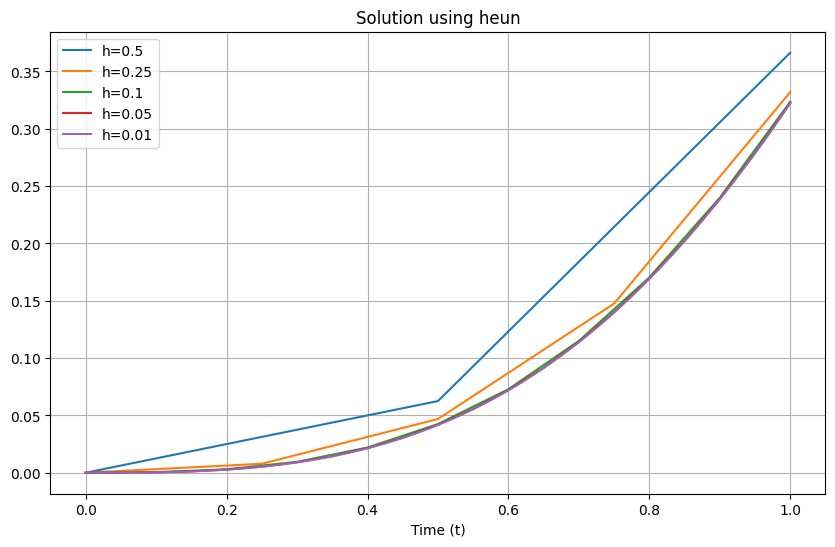

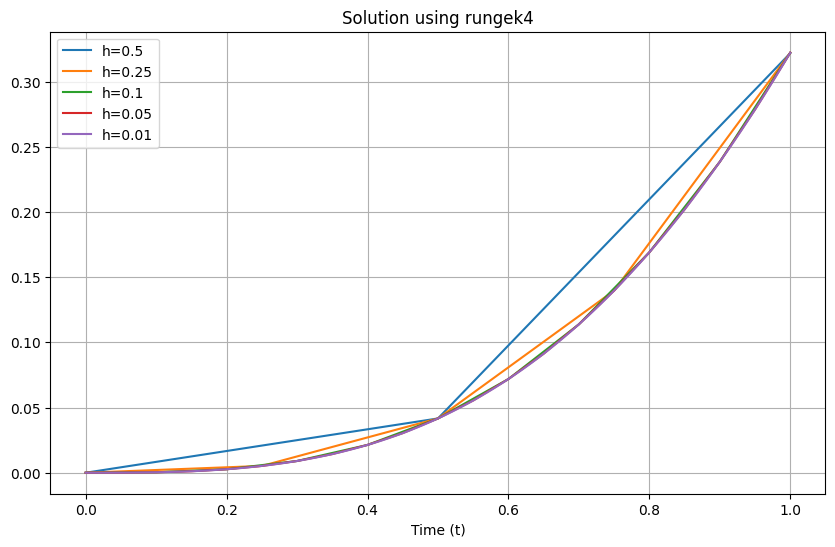

In [6]:
def f(x, y):
    return x * x / (y * y + 1)
t0, tf, f0 = 0, 1, 0
h_values = [0.5, 0.25, 0.1, 0.05, 0.01]
solvers = [euler_fwd, midpoint, heun, rungek4]
for method in solvers:
    plt.figure(figsize=(10, 6))
    plt.title(f'Solution using {method.__name__}')
    plt.xlabel('Time (t)')
    for h in h_values:
        t_values, y_values = method(f, t0, tf, f0, h)
        plt.plot(t_values, y_values[0], label=f'h={h}')
        plt.legend()
    plt.grid(True)
    plt.show()

# Interpretation:
As we can observe that with decrease in value of h, the solution becomes close to actual solution and as low the value of h we take, the solution starts becoming close to each other. For each method, the solution are plotted and we are able to get accurate solutin with RK4 method as observable from above. Initially, there we far deviation from true solution, but as h decreases, the solution gets more and more refined.

# Solution for Question 2

# Question 2(a):

<Figure size 1000x700 with 0 Axes>

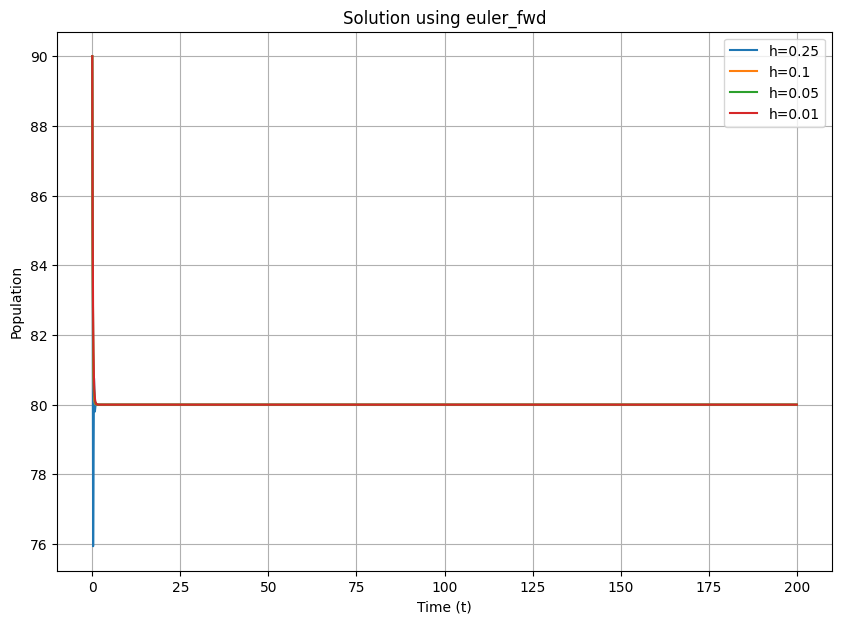

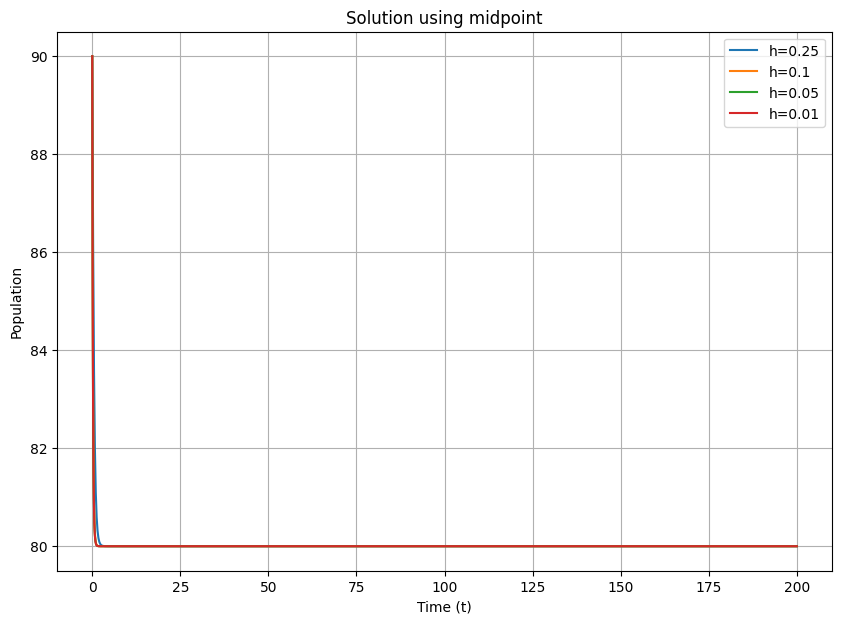

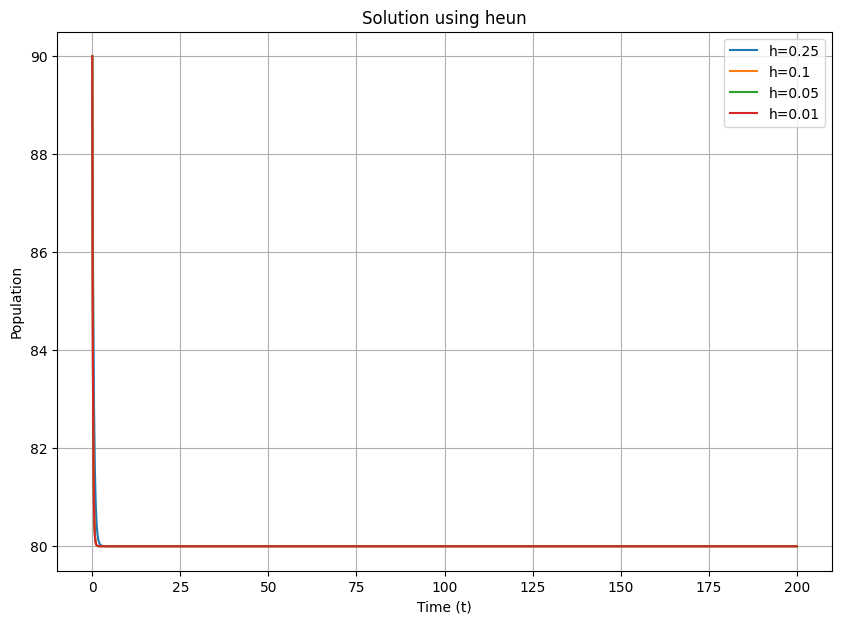

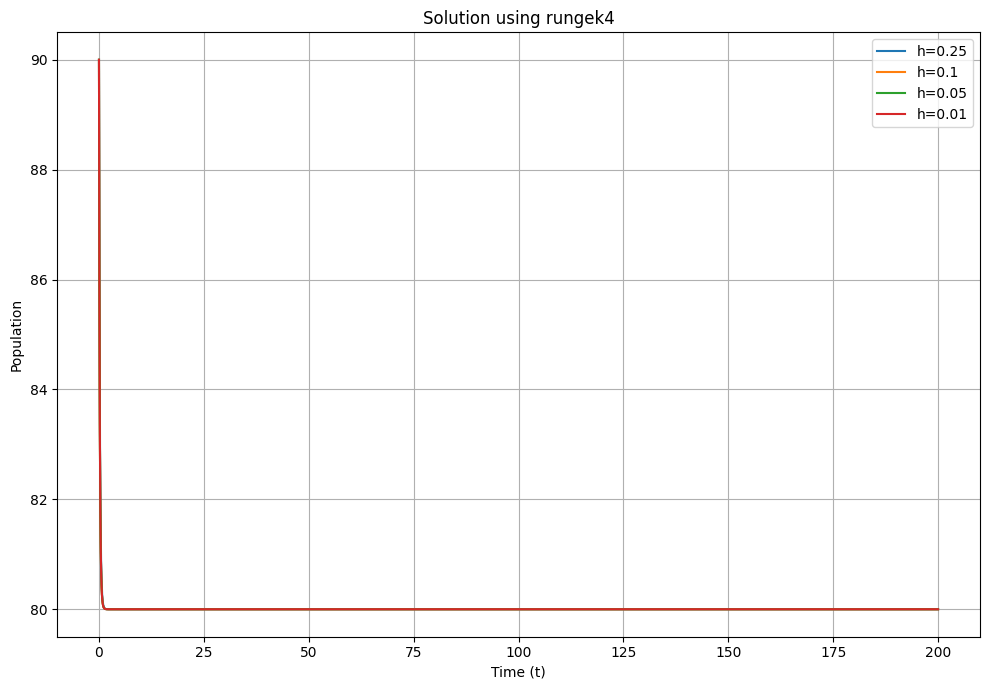

In [7]:
def P(t, P):
    r = 5
    K = 80
    return r * P * (1 - P / K)
t01,tf1,P01 = 0,200,90
h_values = [0.25, 0.1, 0.05, 0.01]
plt.figure(figsize=(10,7))
solvers = [euler_fwd, midpoint, heun, rungek4]
for method in solvers:
    plt.figure(figsize=(10,7))
    plt.title(f'Solution using {method.__name__}')
    plt.xlabel('Time (t)')
    plt.ylabel('Population')
    plt.grid(True)
    for h in h_values:
        t_values, P_values = method(P, t01, tf1, P01, h)
        plt.plot(t_values, P_values[0], label=f'h={h}', linestyle='-')
    plt.legend()
plt.tight_layout()
plt.show()

Zooming the plots of solution to differentiate the solution for different h values, we have the following result

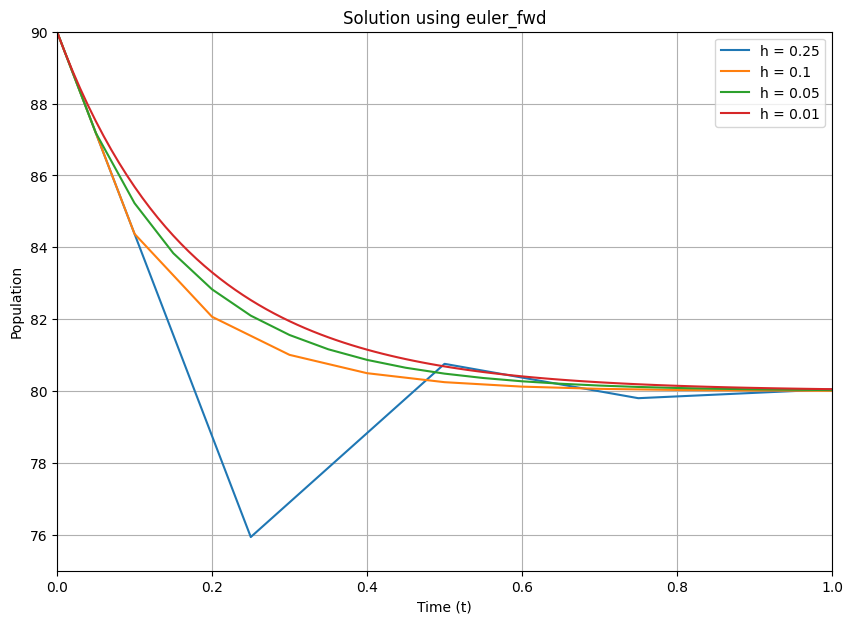

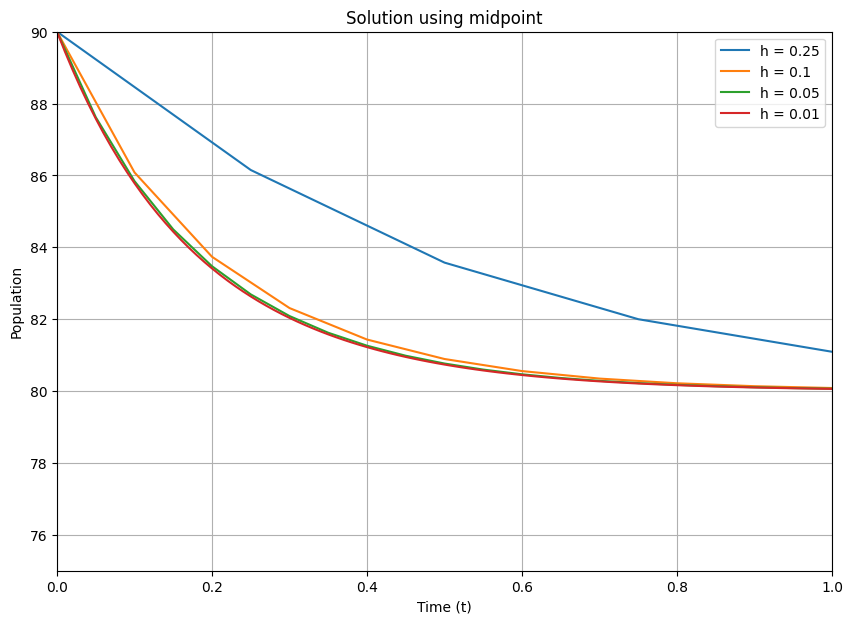

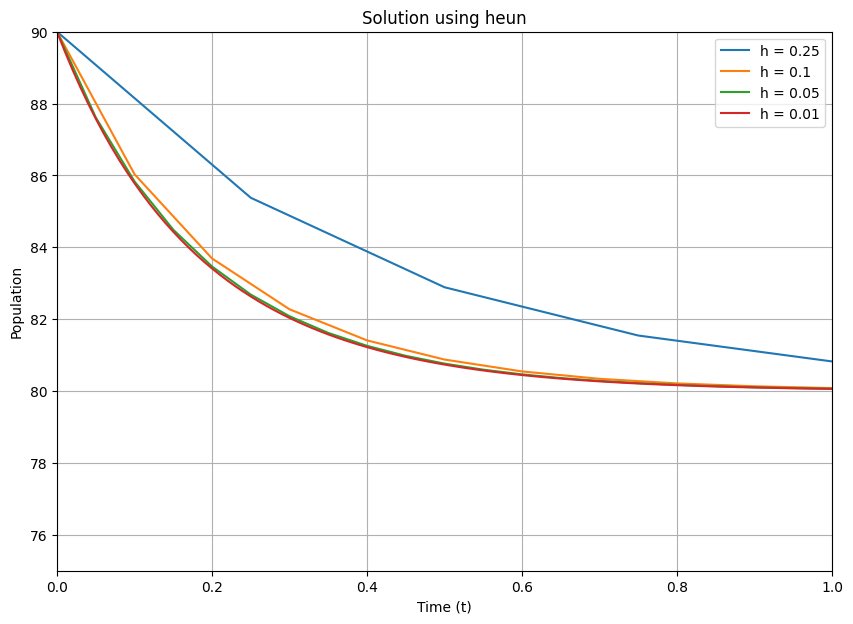

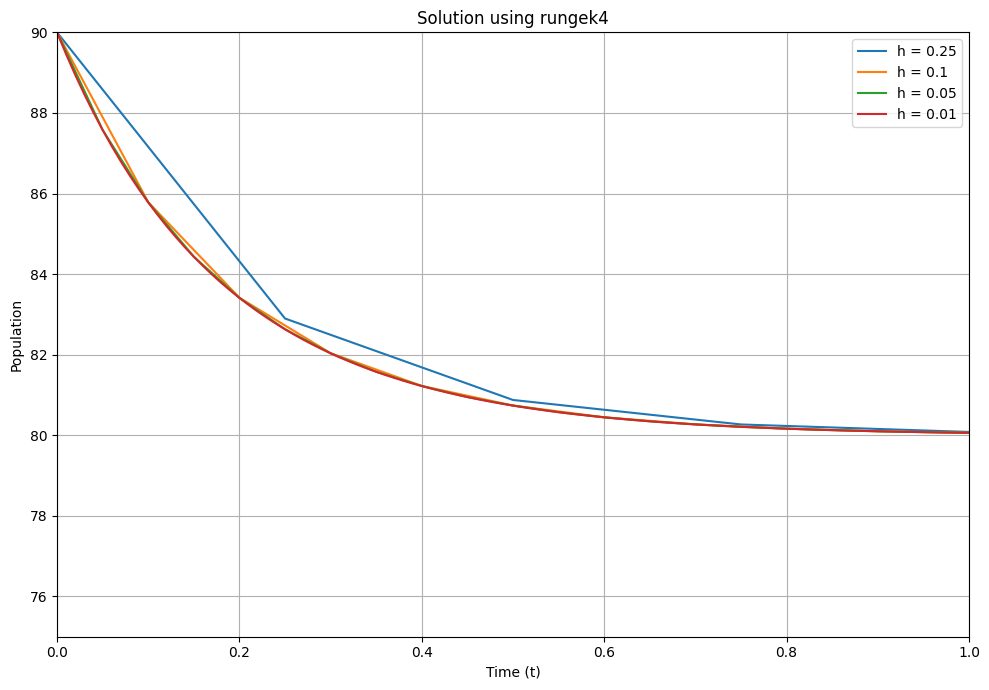

In [8]:
for method in solvers:
    plt.figure(figsize=(10,7))
    plt.title(f'Solution using {method.__name__}')
    plt.xlabel('Time (t)')
    plt.ylabel('Population')
    plt.grid(True)
    for h in h_values:
        t_values, P_values = method(P, t01, tf1, P01, h)
        plt.plot(t_values, P_values[0], label=f'h = {h}', linestyle='-')
        plt.ylim(75,90)
        plt.xlim(0,1)
    plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Interpretation 2(a):
Getting the solution using each method, the accurate solution is given by RK4, we can observe the plots that as the value of h starts decreasing, the solution starts becoming more and more refined towards the true solution, with the given initial conditions. With h = 0.25, the solution behaves in an absurd fashion, comparing to others. The solution odf this equation suggest that as the time increases, the population tends to decrease and becomes saturated, after finite time, to numerical value of 80 (units), which is the carrying capacity of the model.

# Question 2(b):

<Figure size 1800x600 with 0 Axes>

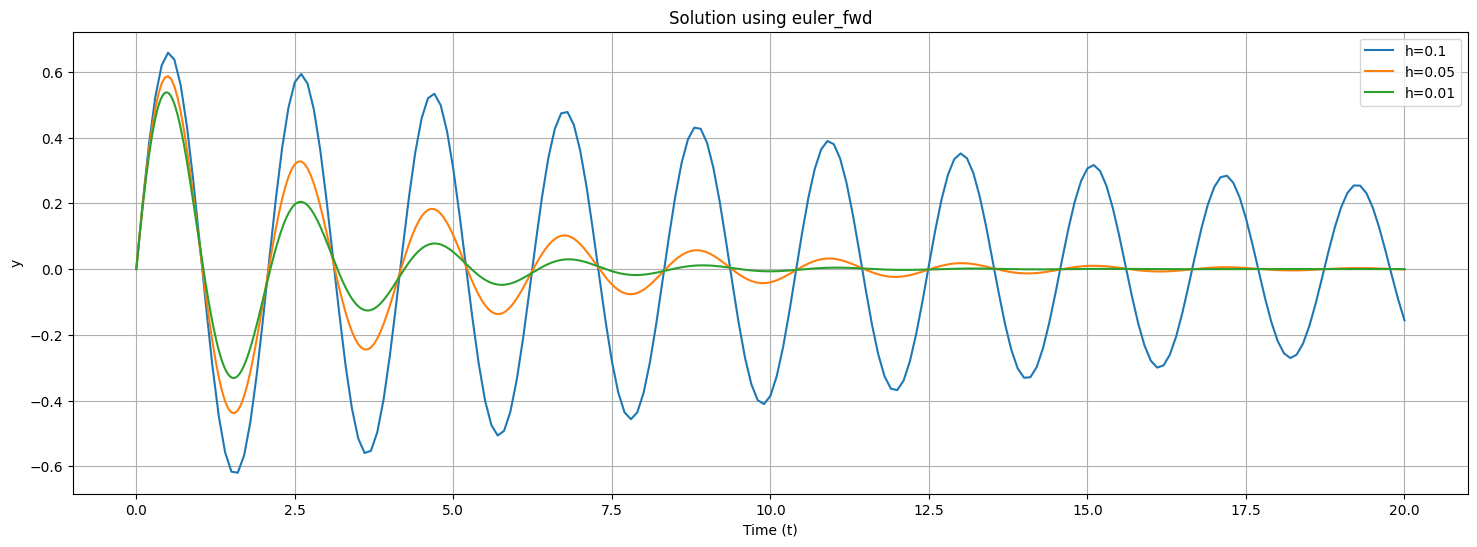

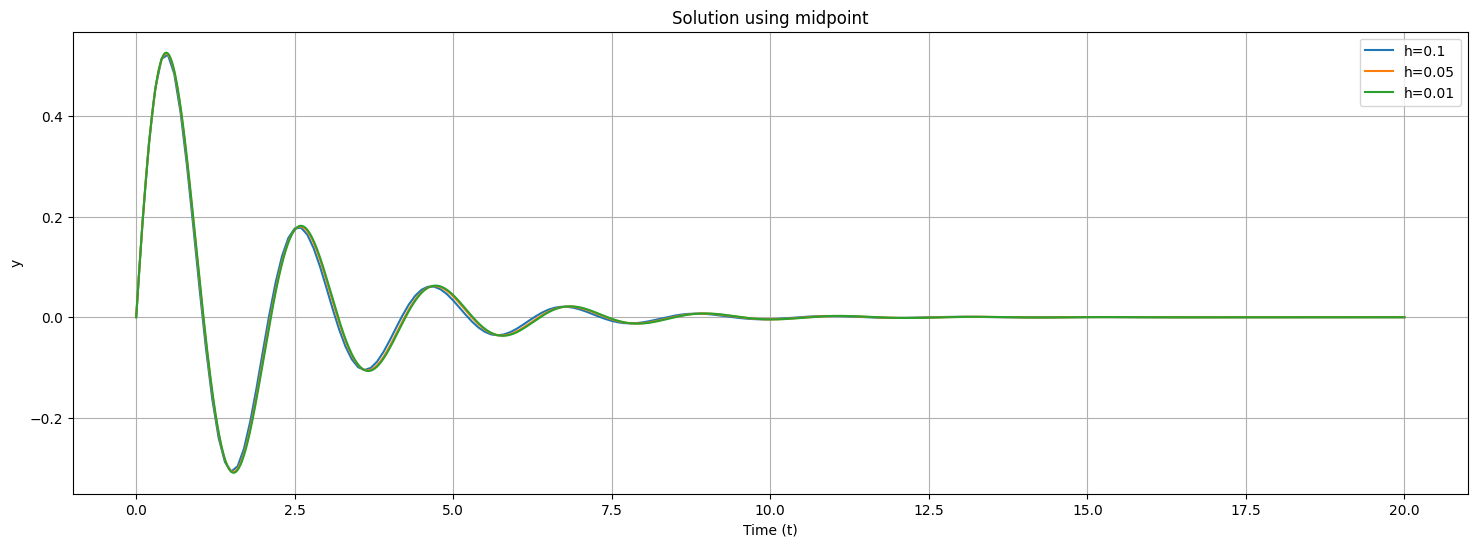

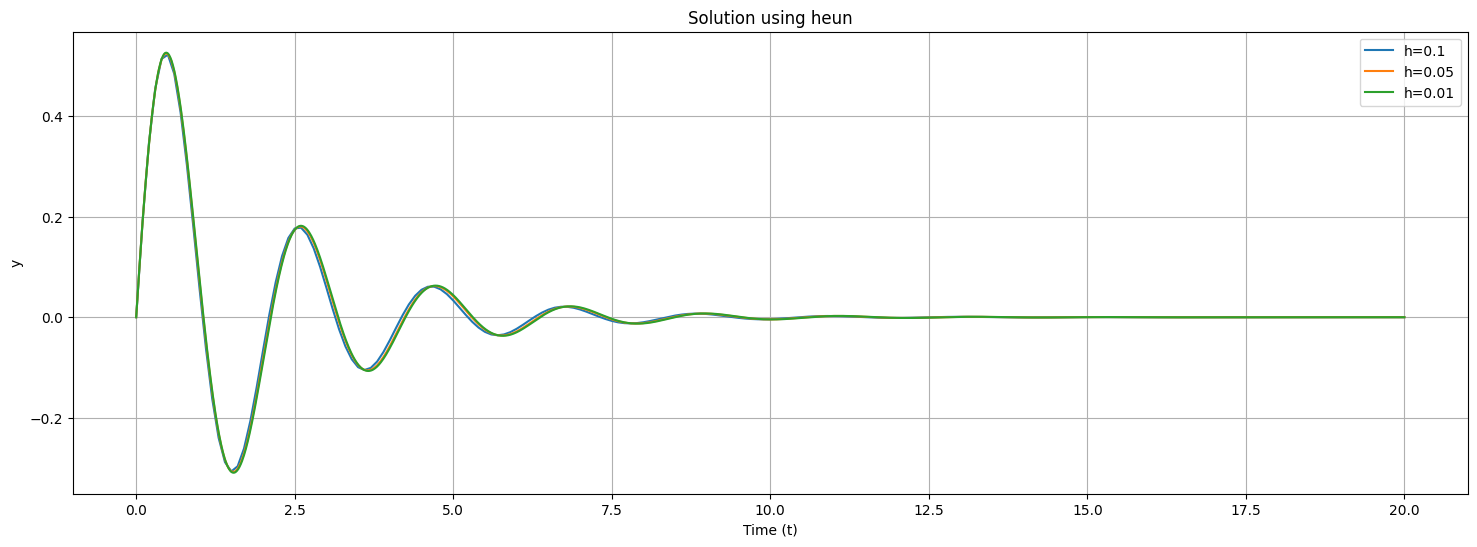

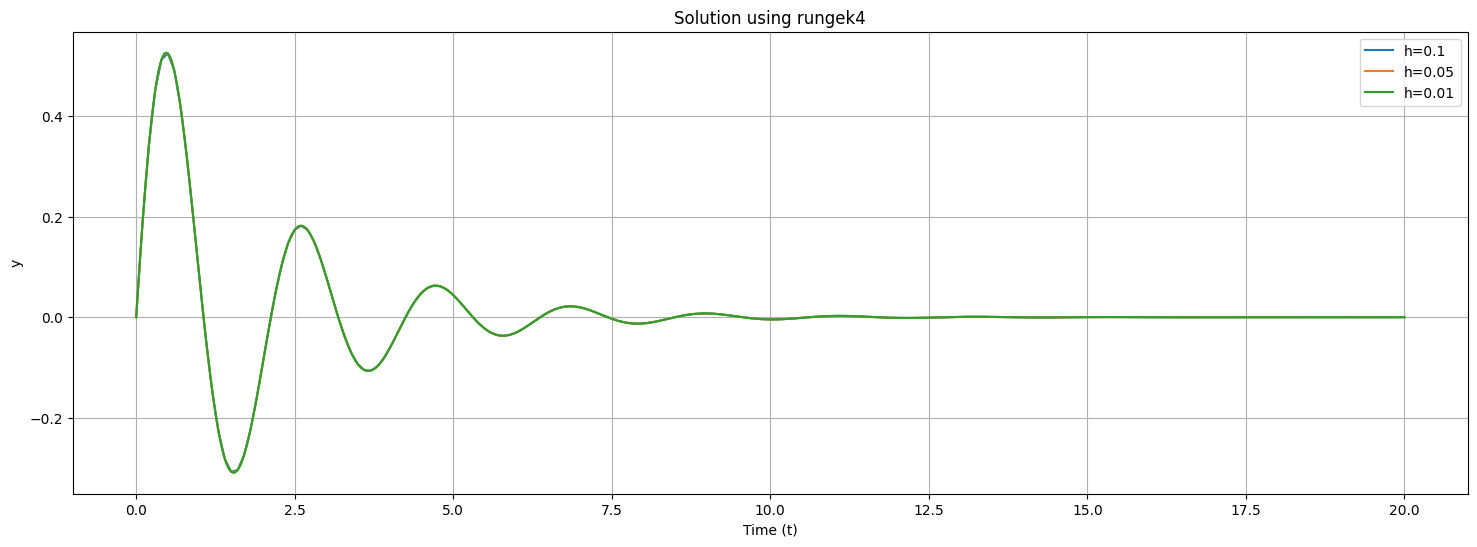

In [9]:
def system(t, y):
    y1 = y[1] 
    y2 = -(c * y1 + k * y[0]) / m
    return [y1, y2]
t02,tn2,y02,m,c,k = 0, 20, [0,2], 10, 10, 90
solvers = [euler_fwd, midpoint, heun, rungek4]
h_vals = [0.1, 0.05, 0.01]
plt.figure(figsize=(18, 6))
for method in solvers:
    plt.figure(figsize=(18, 6))
    plt.title(f'Solution using {method.__name__}')
    plt.xlabel('Time (t)')
    plt.ylabel('y')
    for h in h_vals:
        t, y= method(system, t02, tn2, y02, h)
        plt.plot(t, y[0], label=f'h={h}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interpretation 2(b):
The solution for h = 0.1, corresponding to euler method, is damping oscillations which are decreasing with time however for h values less than 0.1, the oscillations are decreasing very quickly comparing to h = 0.1 and  then system comes into rest after certain time, for midpoint and heuns method, the solutions for different h values are close to each other implies that the solutions are quite accurate with true one and rk4 method gives much accurate than all other methods for all values h.

# Question 2 (c)

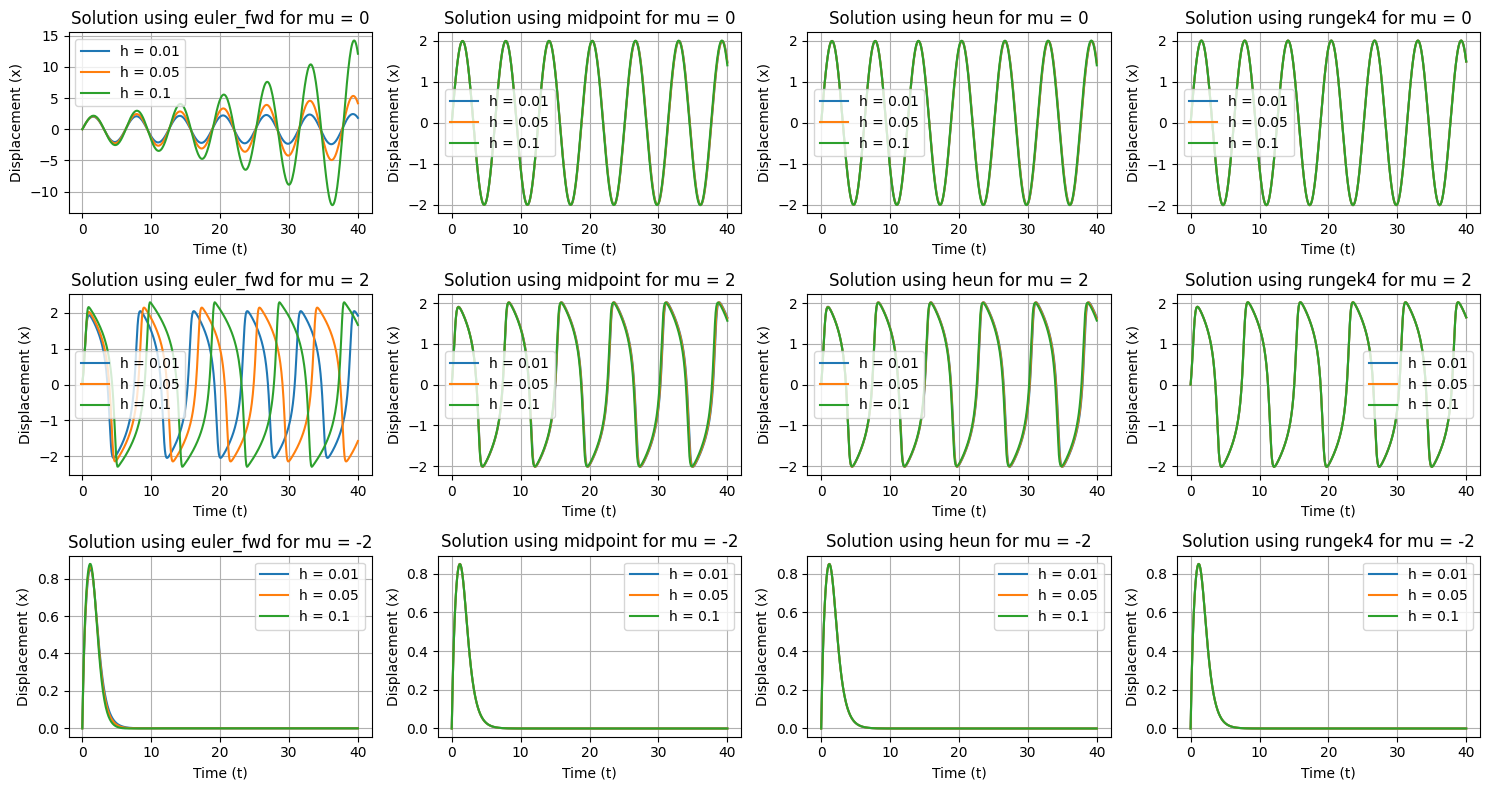

In [10]:
def system2(t, y, mu):
    x1 = y[1]  
    x2 = -mu * (y[0]**2 - 1) * x1 - y[0]
    return [x1,x2]
t03, tn3, y03 = 0, 40, [0, 2] 
mu_vals = [0, 2, -2]
h_vals = [0.01, 0.05, 0.1]
solvers = [euler_fwd, midpoint, heun, rungek4]
plt.figure(figsize=(15, 8))
for mu in mu_vals:
    for method in solvers:
        plt.subplot(3, 4, mu_vals.index(mu) * 4 + [euler_fwd, midpoint, heun, rungek4].index(method) + 1)
        plt.title(f'Solution using {method.__name__} for mu = {mu}')
        plt.xlabel('Time (t)')
        plt.ylabel('Displacement (x)')
        for h in h_vals:
            t_vals, y_vals = method(lambda t, y: system2(t, y, mu), t03, tn3, y03, h)
            plt.plot(t_vals, y_vals[0], label=f'h = {h}')
        plt.legend()
        plt.grid(True)
plt.tight_layout()
plt.show()

Plotting the solutions again (zooming)

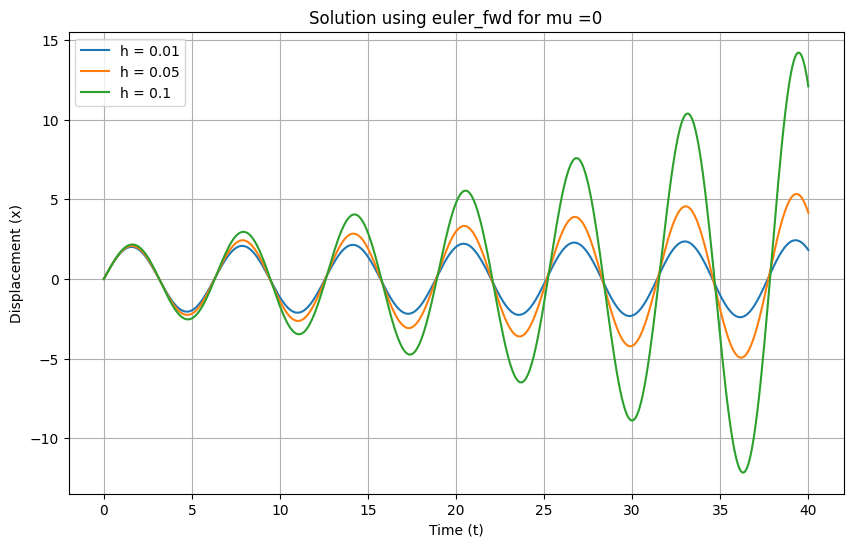

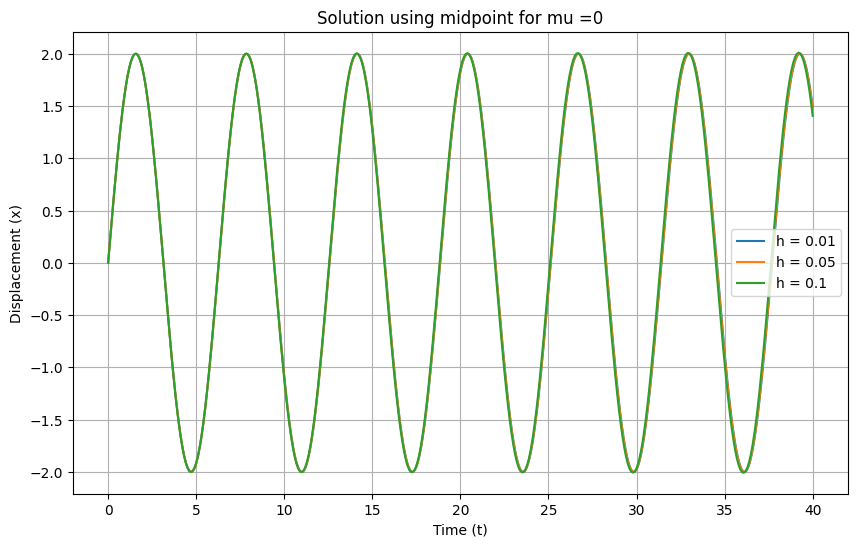

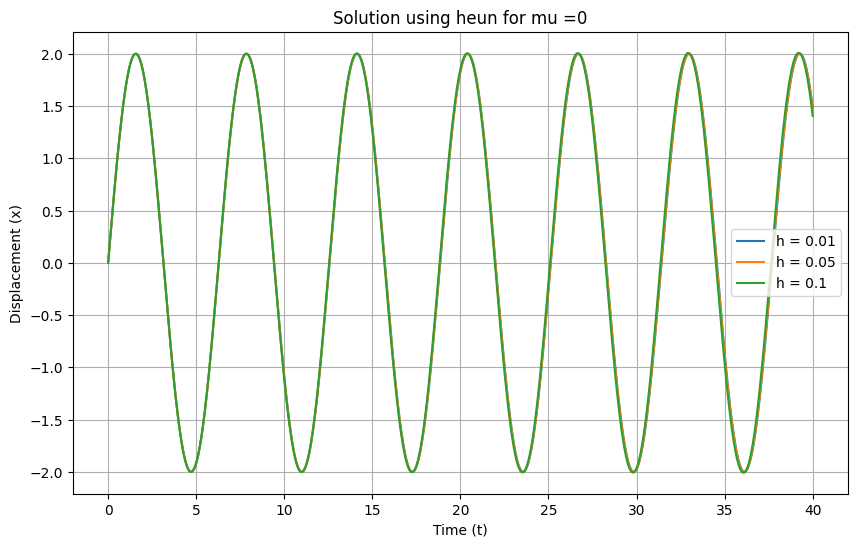

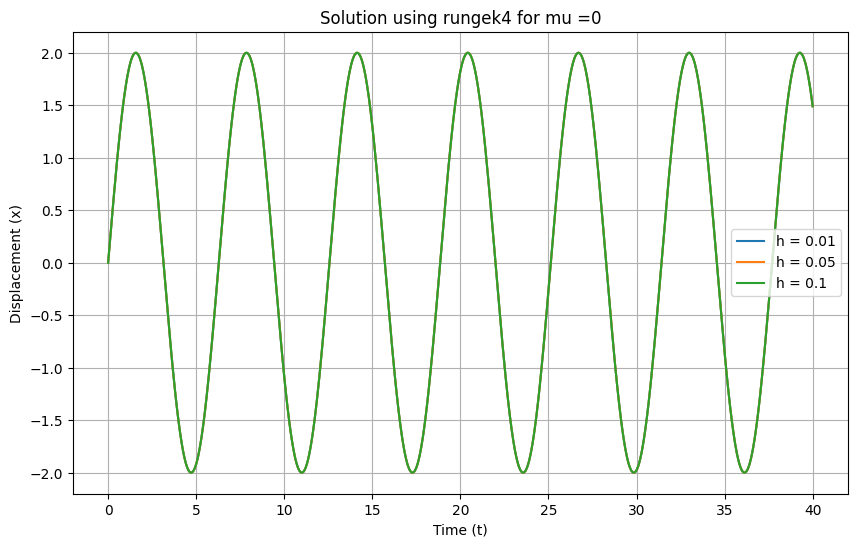

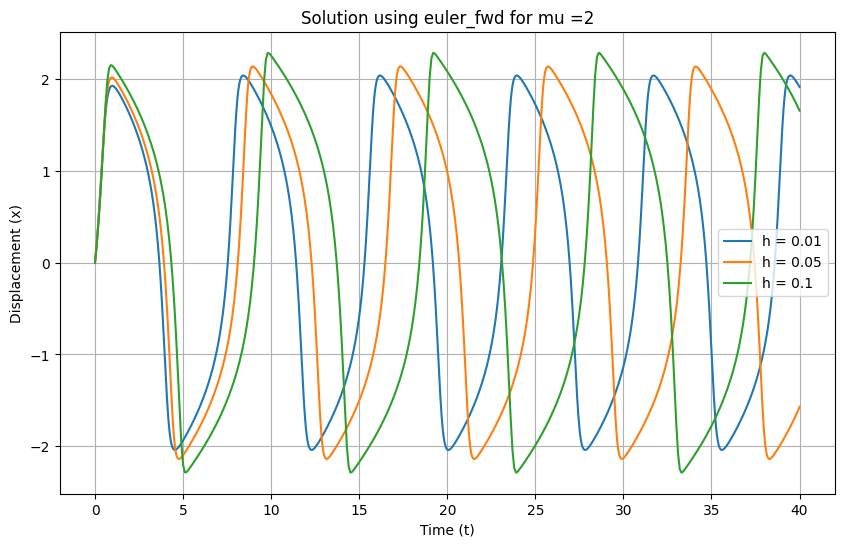

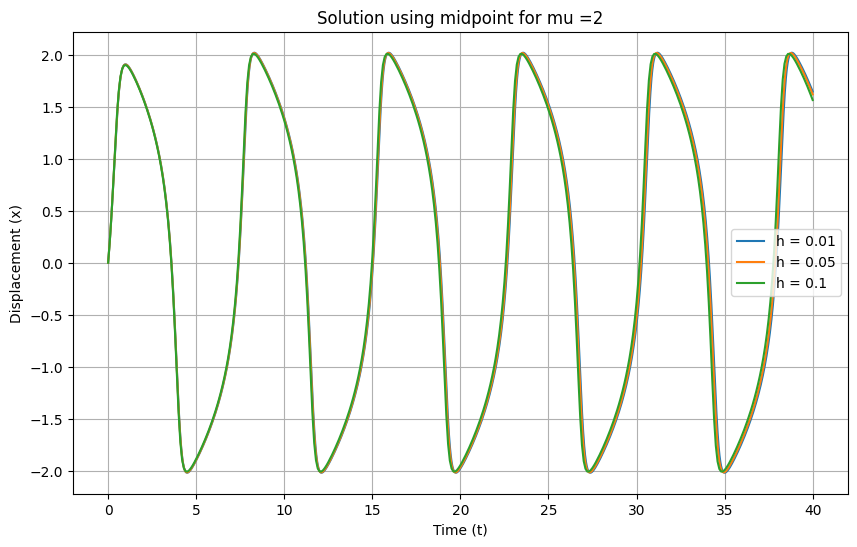

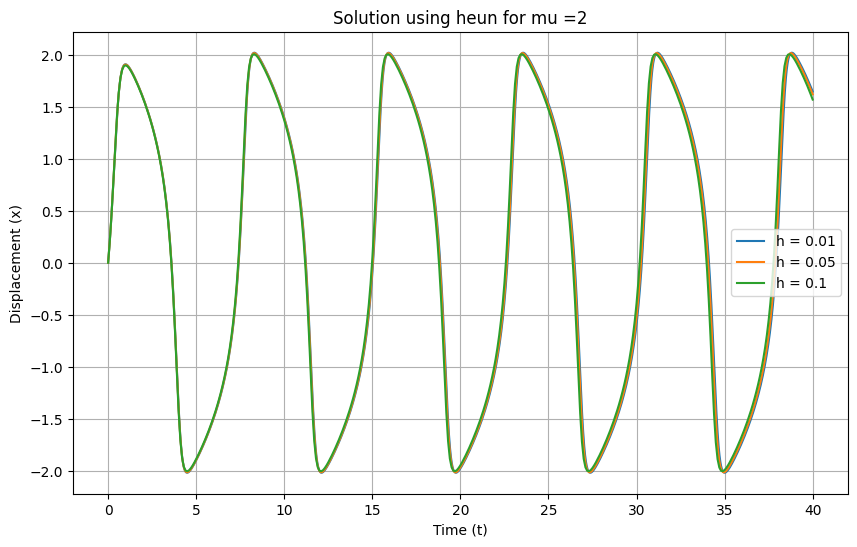

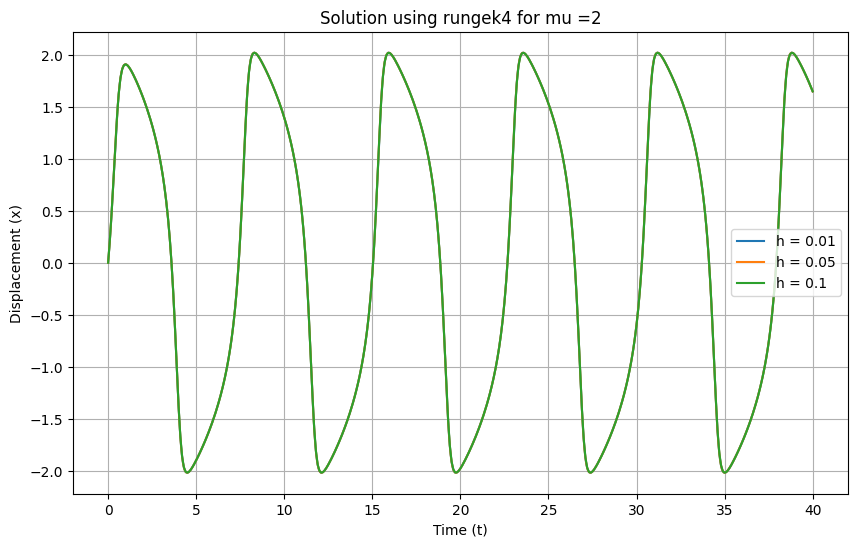

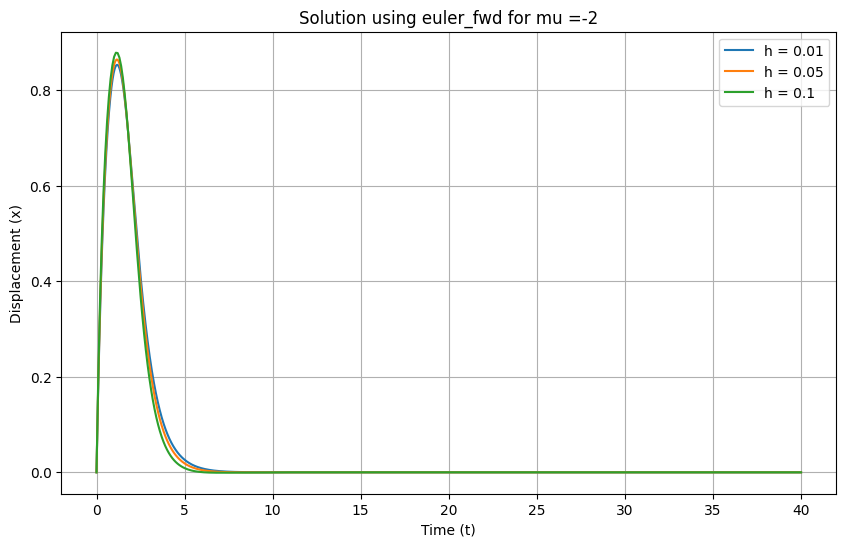

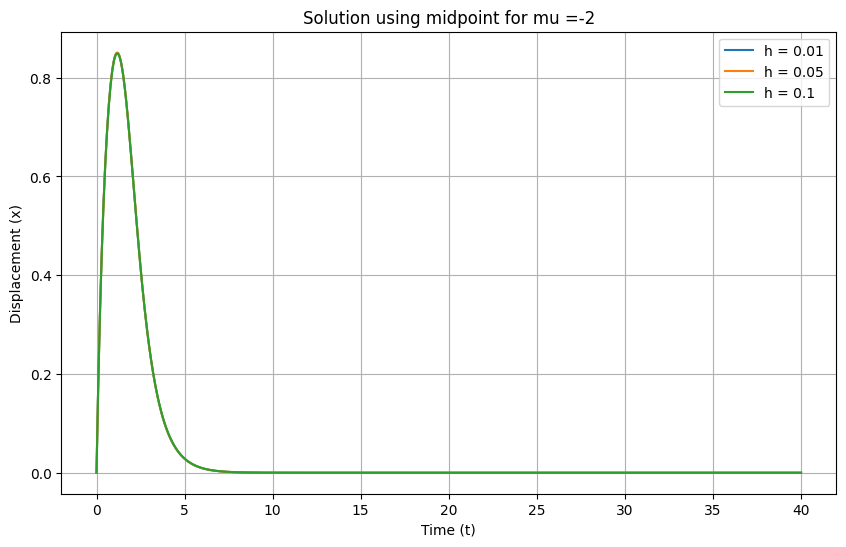

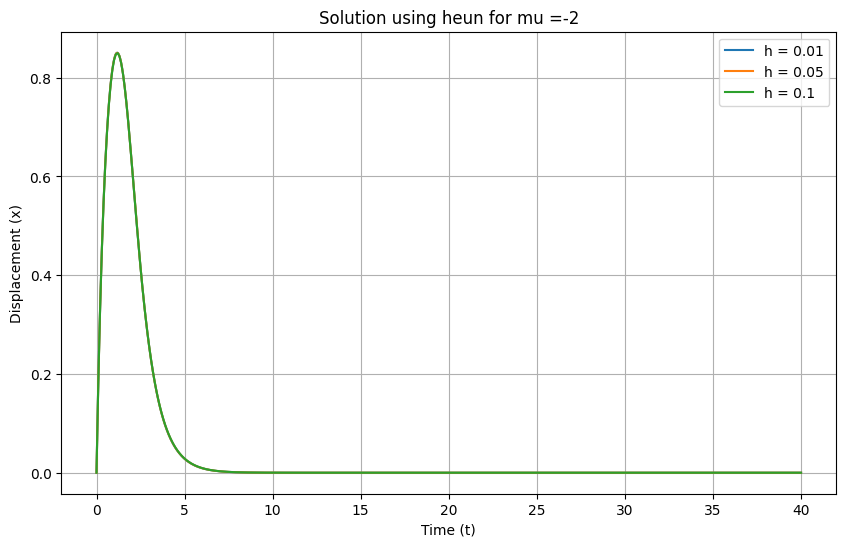

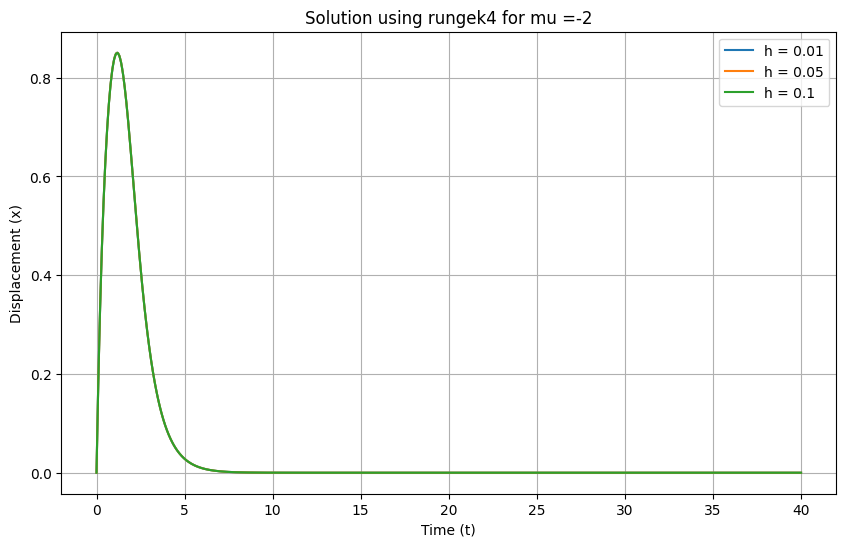

In [11]:
for mu in mu_vals:
    for method in solvers:
        plt.figure(figsize=(10, 6))
        plt.title(f'Solution using {method.__name__} for mu ={mu}')
        plt.xlabel('Time (t)')
        plt.ylabel('Displacement (x)')
        for h in h_vals:
            t_values, y_values = method(lambda t, y: system2(t, y, mu), t03, tn3, y03, h)
            plt.plot(t_values, y_values[0], label=f'h = {h}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Interpretation for 2(c):
* For mu = 0, the solution by euler method grows as damping oscillation and this happens for each h value however for other methods, the solution remains periodic with undamped oscillations (oscillations with constant amplitude) and as wave propagates, the different solutions travels with different wavelength.
* For mu = 1, As h value increases, the amplitude of the solution osciallations increases and vice versa, rest for other methods, for different h values, the solution behave same way as constant amplitude oscillations.
* For mu = -2, For each method, the solution first increases, then decreases and become constant after certain finite time interval, however for euler method, the peak of solution is different for different h values

# Solution for Question 3:

# Part 3(a)

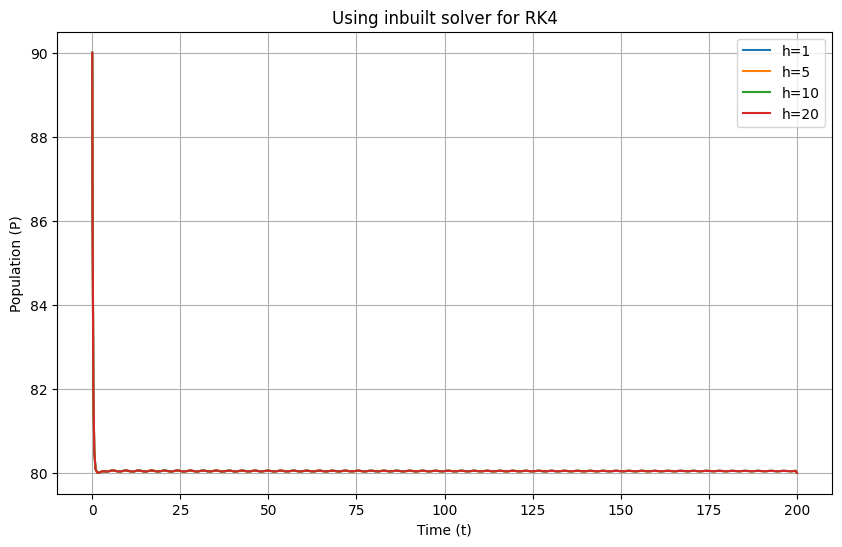

In [12]:
def P(t, P, r, K):
    return r * P * (1 - P / K)
t04, tf4,  P02, r, K = 0,200, 90, 5, 80
h_vals = [1, 5, 10, 20]
plt.figure(figsize=(10, 6))
for h in h_vals:
    sol = solve_ivp(P, [t04, tf4], [P02], args=(r, K), method='RK45', max_step=h)
    plt.plot(sol.t, sol.y[0], label=f'h={h}')
plt.title('Using inbuilt solver for RK4')
plt.xlabel('Time (t)')
plt.ylabel('Population (P)')
plt.legend()
plt.grid(True)
plt.show()

Thus observing, we have the result that the solution is similar to what we did without in built library function and the population tends to 80 after finite certain time interval.
There is close agreement between the solutions.

# Part 3(b)

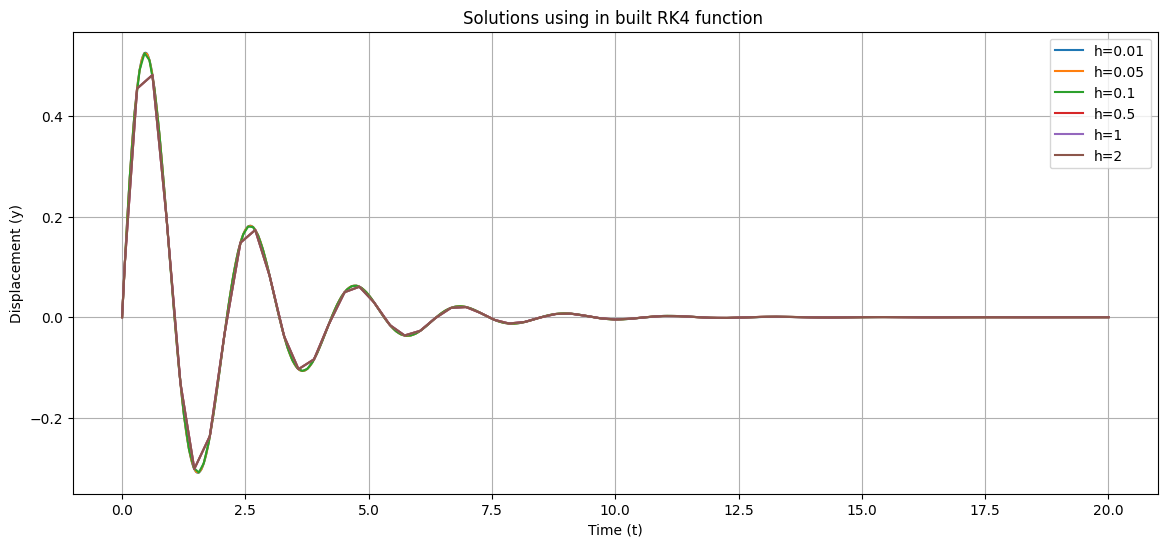

In [13]:
def system(t, y, m, c, k):
    y1 = y[1]  
    y2 = -(c * y1 + k * y[0]) / m
    return [y1, y2]
t05,tf5,y05,m2,c2,k2 = 0,20,[0,2], 10,10,90
hvals = [0.01, 0.05, 0.1, 0.5,1,2]
plt.figure(figsize=(14, 6))
for h in hvals:
    sol = solve_ivp(system, [t05, tf5], y05, args=(m2, c2, k2), method='RK45', max_step=h)
    plt.plot(sol.t, sol.y[0], label=f'h={h}')
plt.title('Solutions using in built RK4 function ')
plt.xlabel('Time (t)')
plt.ylabel('Displacement (y)')
plt.legend()
plt.grid(True)
plt.show()

This solution, using inbuilt function, is also in the close agreement with that obtained from our formulation and behaving similarly with different h values as in previous solution.

# Part 3(c)

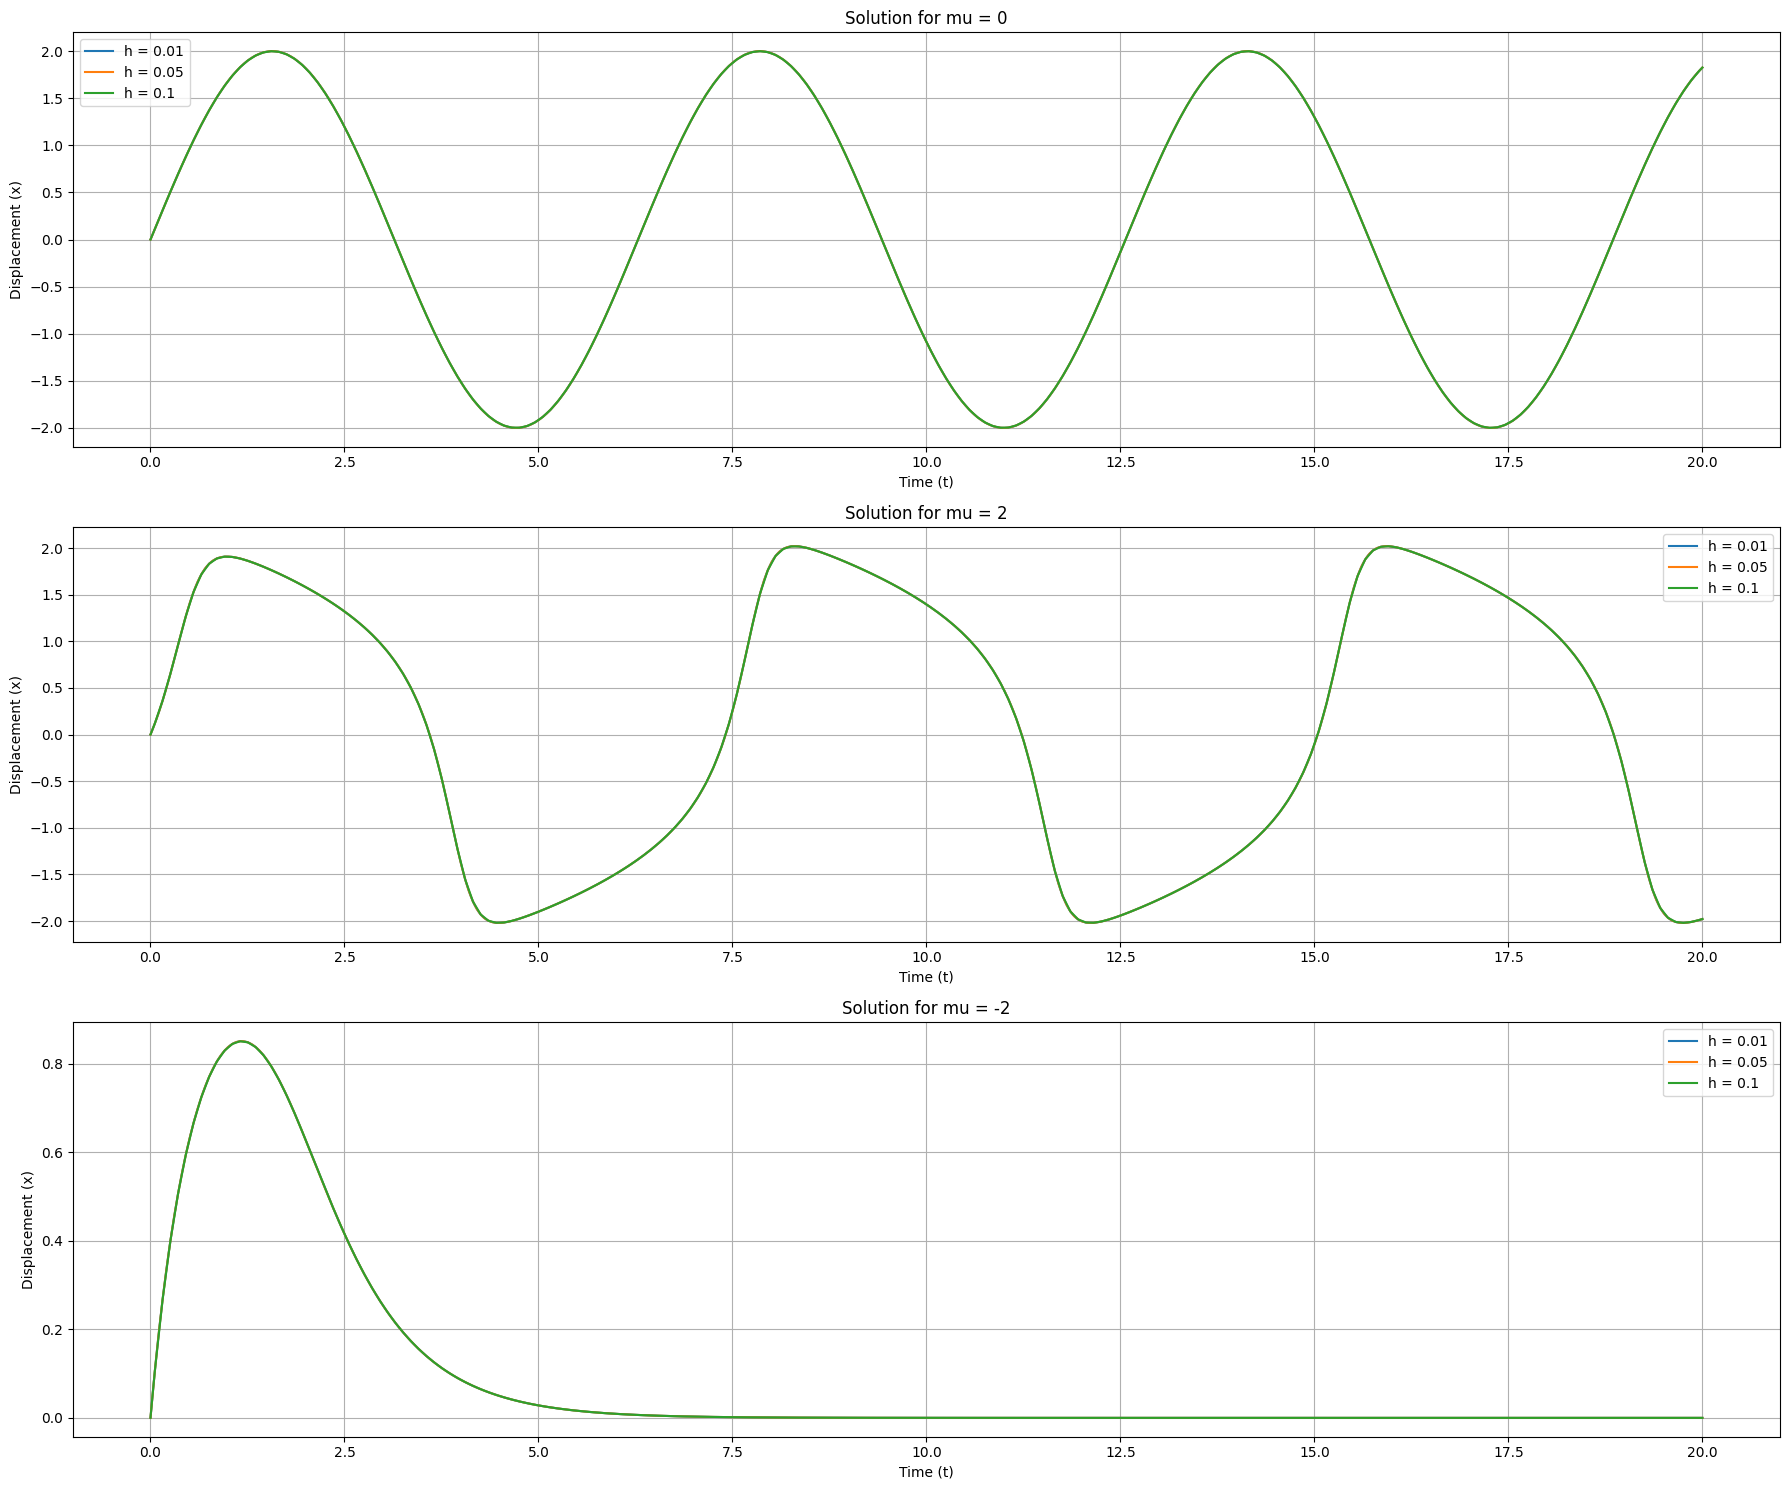

In [14]:
def system2(t, y, mu):
    x, v = y
    return [v, -mu * (x**2 - 1) * v - x]
t06,tf6,y06 = 0, 20, [0,2] 
mus = [0, 2, -2]  
h_values = [0.01, 0.05, 0.1]
plt.figure(figsize=(18, 15))
for mu in mus:
    plt.subplot(3, 1, mus.index(mu) + 1)
    plt.title(f'Solution for mu = {mu}')
    plt.xlabel('Time (t)')
    plt.ylabel('Displacement (x)')
    plt.grid(True)
    for h in h_values:
        sol = solve_ivp(lambda t, y: system2(t, y, mu), [t06, tf6], y06, method='RK45', max_step=h)
        plt.plot(sol.t, sol.y[0], label=f'h = {h}')
    plt.legend()
plt.tight_layout()
plt.show()


This solution, using inbuilt function, is also in the close agreement with that obtained from our formulation and behaving similarly with different h values as in previous solution. Also since rk4 gives more accurate solution, thus we can see that for different values of h, the solution are close to each other or overlapping with each other.